# **Kaggle HW5:**

**Remember to write your team name above, which MUST match your team name on Kaggle!!** Assignments without a team name will receive a 0/40 on the "accuracy on test data" component of this assignment's grade.

### **Load the Data**

In [55]:
# This cell is necessary only if you are running on Google Colab. It downloads the files to your
# Colab instance so you don't have to upload them here.

import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
      f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_train.csv', 
          'edx_train.csv')
save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_test.csv', 
          'edx_test.csv')

### **Sample Code: Random Classifier**

**NOTE**: This classifier **DOES NOT** count as one of the 2 required for this assignment! It is merely here to illstrate how to submit your predictions.

See the Kaggle assignment (Data tab) for a description of each column in the dataset. You are creating a classifier to predict whether or not a student will get certified, stored in the `"certified"` column.

In [56]:
import pandas as pd
from sklearn.dummy import DummyClassifier

target = "certified" # target column

# This classifier returns labels sampled uniformly at random
df_train = pd.read_csv('edx_train.csv')
dummy_model = DummyClassifier(strategy="uniform")
dummy_model.fit(df_train.drop(target, axis=1), df_train[target])

DummyClassifier(strategy='uniform')

The code below generates predictions on the test set, and outputs the predictions into a CSV file.

In [57]:
# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')
predictions = dummy_model.predict(df_test)

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

# See below for instructions on how to upload submission.csv to Kaggle,
# in order to evaluate your model and get points.

### **[5 Pts] Model Comparison**

**Instructions**: Run at least 2 different classification models. The classification models we have learned in class are: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [Neural Networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html). For each model, try at least 2 different hyperparameter settings. 

Then, make one or more visualizations that let you compare the models you trained. Sample visualizations you can make include confusion matrices, or graphs of train and validation accuracy/error. See past section and homework code for how to make these visualizations.

#### Preprocessing

course_id            0.000000
userid_DI            0.000000
registered           0.000000
viewed               0.000000
explored             0.000000
certified            0.000000
final_cc_cname_DI    0.000000
LoE_DI               0.110299
YoB                  0.104362
gender               0.088491
start_time_DI        0.000000
last_event_DI        0.172185
nevents              0.187143
ndays_act            0.187143
nplay_video          0.770381
nchapters            0.292647
nforum_posts         0.000000
dtype: float64


<Axes: >

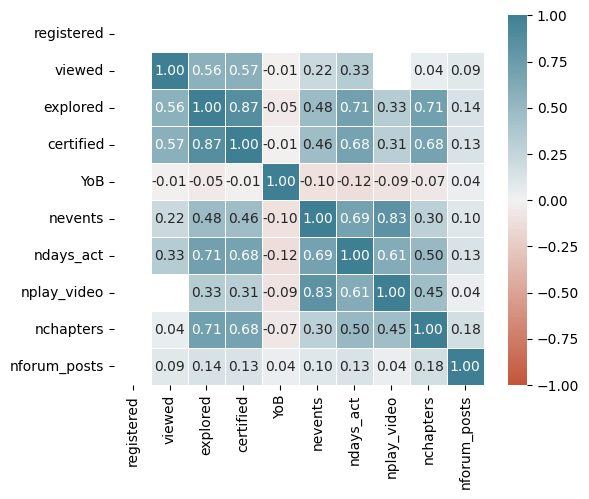

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('edx_train.csv')
# Inspect the dimension of the data
df.shape
# Inspecting the missing value in the dataset
percentage_missing = df.isnull().sum()/len(df)
print(percentage_missing)

sns.heatmap(df.corr(numeric_only=True), 
            vmin=-1, vmax=1, annot=True, annot_kws={"size":10}, cmap=sns.diverging_palette(20, 220, n=256), fmt='.2f', linewidths=0.5, linecolor='w', square=True)

<Axes: >

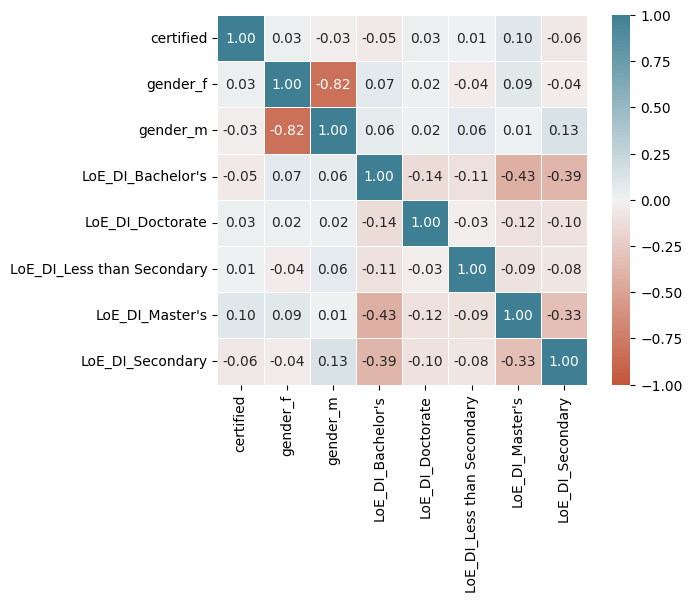

In [27]:
df_cat = df[['certified', 'gender', 'LoE_DI']]
df_cat = pd.get_dummies(df_cat)
sns.heatmap(df_cat.corr(numeric_only=True), 
            vmin=-1, vmax=1, annot=True, annot_kws={"size":10}, cmap=sns.diverging_palette(20, 220, n=256), fmt='.2f', linewidths=0.5, linecolor='w', square=True)

In [29]:
# Select features help prediction
features = ['registered', 'viewed', 'explored', 'nevents', 'ndays_act', 'nchapters', 'nforum_posts']
target = ['certified']

train = df[features + target]
imputer = SimpleImputer(strategy='median')
train = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)
train.shape

X = train[features]
y = train['certified']
# Reshape the target column
y = np.ravel(y)

#### Logistic Regression

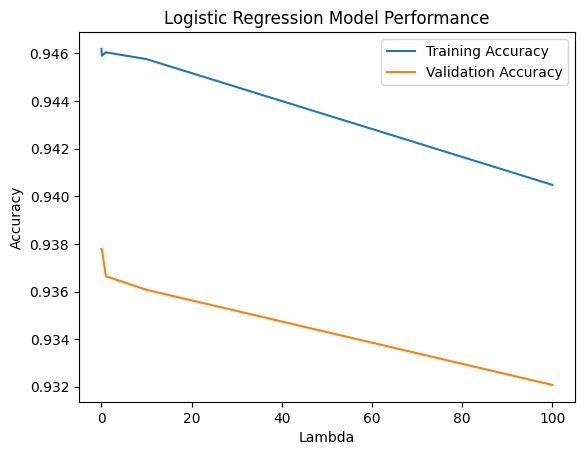

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, random_state=0)

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a pipeline with data scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))  # Increase max_iter to avoid convergence issues
])

# Define the hyperparameters to compare
hyperparameters = [0.01, 0.1, 1, 10, 100]

# Create empty lists to store accuracy scores for each hyperparameter
train_scores = []
val_scores = []

# Train logistic regression models with different hyperparameters using the pipeline
for lam in hyperparameters:
    # Set the hyperparameter value in the pipeline
    pipeline.set_params(logreg__C=1/lam)

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Evaluate the model on the training set
    train_score = pipeline.score(X_train, y_train)
    train_scores.append(train_score)

    # Evaluate the model on the validation set
    val_score = pipeline.score(X_val, y_val)
    val_scores.append(val_score)

# Plot the accuracy scores for each hyperparameter
plt.plot(hyperparameters, train_scores, label='Training Accuracy')
plt.plot(hyperparameters, val_scores, label='Validation Accuracy')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Model Performance')
plt.legend()
plt.show()

model_reg = LogisticRegression(C = 0.1, random_state = 0)
model_reg.fit(X_train, y_train)

In [60]:
# Inspect the test data
# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')

test = df_test[features]
test = pd.DataFrame(imputer.fit_transform(test), columns=test.columns)

predictions = model_reg.predict(test)
predictions = predictions.astype(int)

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions

to_save.to_csv('submission.csv', index=False)

# See below for instructions on how to upload submission.csv to Kaggle,
# in order to evaluate your model and get points.

#### Decision Tree

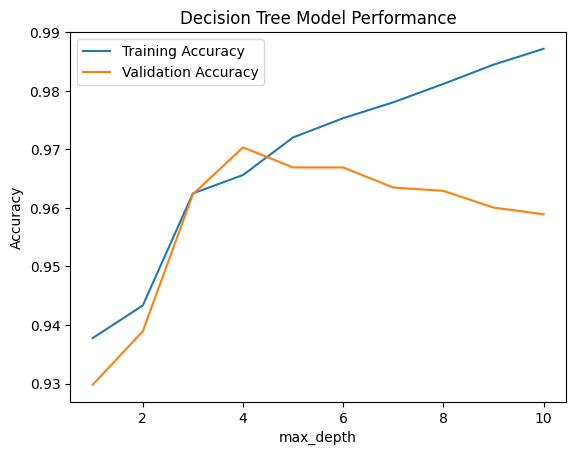

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores = []
val_scores = []

for depth in max_depths:
    # Create and fit the decision tree model
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X_train, y_train)

    # Evaluate the model on the training set
    train_score = model.score(X_train, y_train)
    train_scores.append(train_score)

    # Evaluate the model on the validation set
    val_score = model.score(X_val, y_val)
    val_scores.append(val_score)

plt.plot(max_depths, train_scores, label='Training Accuracy')
plt.plot(max_depths, val_scores, label='Validation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Model Performance')
plt.legend()
plt.show()

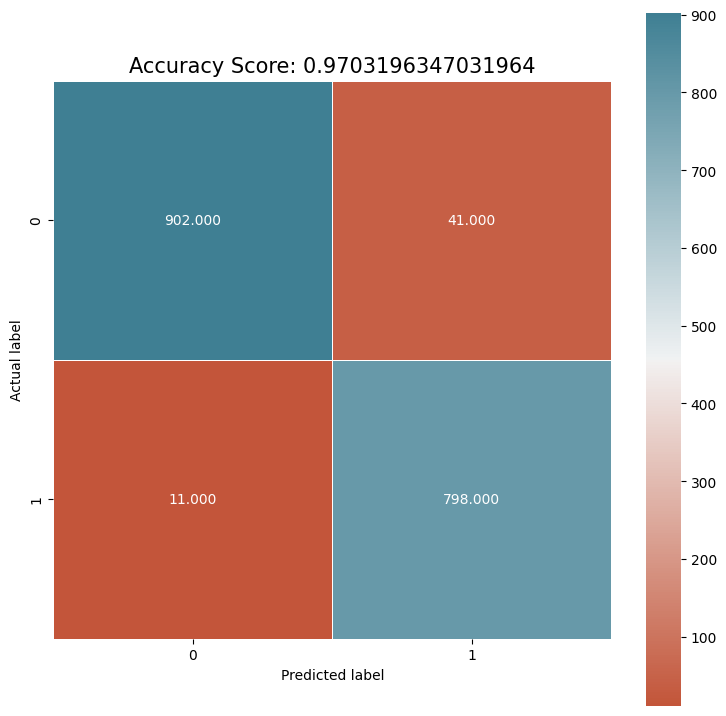

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def visualize_confusion_matrix(test, pred, score):
    cm = confusion_matrix(test, pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap=sns.diverging_palette(20, 220, n=256))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size=15)

# Choose the model with the best performance
model_decision = DecisionTreeClassifier(max_depth=4)
model_decision.fit(X_train, y_train)

# Let's see and visualize how our predictions look
dt_y_pred = model_decision.predict(X_val)
dt_score = model_decision.score(X_val, y_val)
visualize_confusion_matrix(y_val, dt_y_pred, dt_score)

In [63]:
# Inspect the test data
# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')

test = df_test[features]
test = pd.DataFrame(imputer.fit_transform(test), columns=test.columns)

predictions = model_decision.predict(test)
predictions = predictions.astype(int)

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions

to_save.to_csv('submission.csv', index=False)

# See below for instructions on how to upload submission.csv to Kaggle,
# in order to evaluate your model and get points.

#### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10, 20]
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': 10, 'n_estimators': 100}
Best Score:  0.9703115056394402


Depth 1
Depth 3
Depth 5
Depth 7
Depth 9
Depth 11
Depth 13
Depth 15
Depth 17
Depth 19
Depth 21
Depth 23
Depth 25


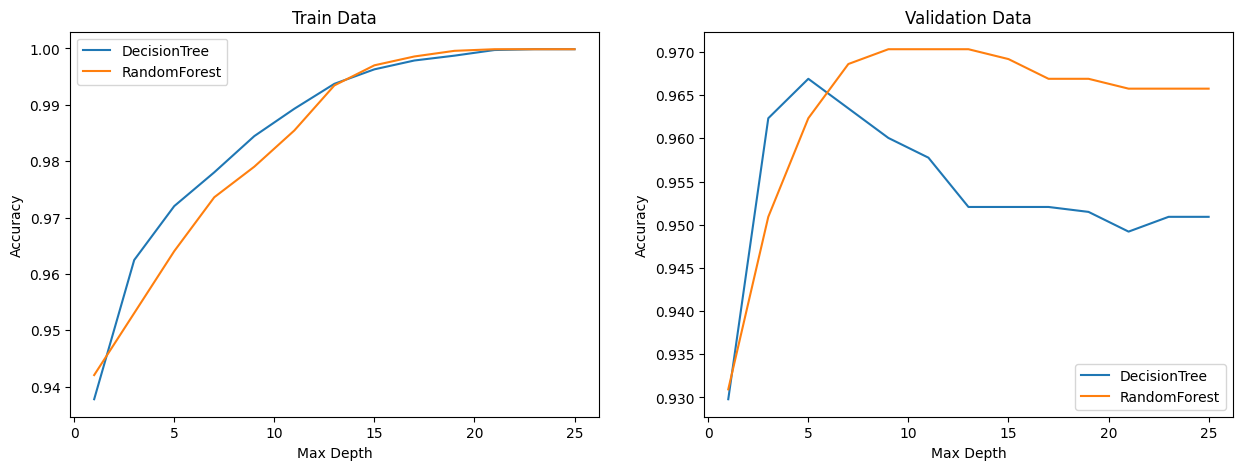

In [65]:
from sklearn.metrics import accuracy_score

# First calculate the accuracies for each depth
depths = list(range(1, 26, 2))
dt_accuracies = []
rf_accuracies = []

for i in depths:
    print(f'Depth {i}')

    # Train and evaluate a Decision Tree Classifier with given max_depth
    tree = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree.fit(X_train, y_train)
    dt_accuracies.append((
        accuracy_score(tree.predict(X_train), y_train),
        accuracy_score(tree.predict(X_val), y_val)
    ))
    
    # Train and evaluate our RandomForest classifier with given max_depth 
    rf = RandomForestClassifier(max_depth=i, random_state=0)
    rf.fit(X_train, y_train)
    rf_accuracies.append((     
        accuracy_score(rf.predict(X_train), y_train),
        accuracy_score(rf.predict(X_val), y_val)
    ))
    
# Then plot the scores
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot training accuracies
axs[0].plot(depths, [acc[0] for acc in dt_accuracies], label='DecisionTree')
axs[0].plot(depths, [acc[0] for acc in rf_accuracies], label='RandomForest')

# Plot validation accuracies
axs[1].plot(depths, [acc[1] for acc in dt_accuracies], label='DecisionTree')
axs[1].plot(depths, [acc[1] for acc in rf_accuracies], label='RandomForest')

# Customize plots
axs[0].set_title('Train Data')
axs[1].set_title('Validation Data')
for ax in axs:
    ax.legend()
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Accuracy')

n_estimators: 50, max_depth: 5
n_estimators: 50, max_depth: 10
n_estimators: 50, max_depth: 15
n_estimators: 50, max_depth: 20
n_estimators: 100, max_depth: 5
n_estimators: 100, max_depth: 10
n_estimators: 100, max_depth: 15
n_estimators: 100, max_depth: 20
n_estimators: 200, max_depth: 5
n_estimators: 200, max_depth: 10
n_estimators: 200, max_depth: 15
n_estimators: 200, max_depth: 20
n_estimators: 300, max_depth: 5
n_estimators: 300, max_depth: 10
n_estimators: 300, max_depth: 15
n_estimators: 300, max_depth: 20


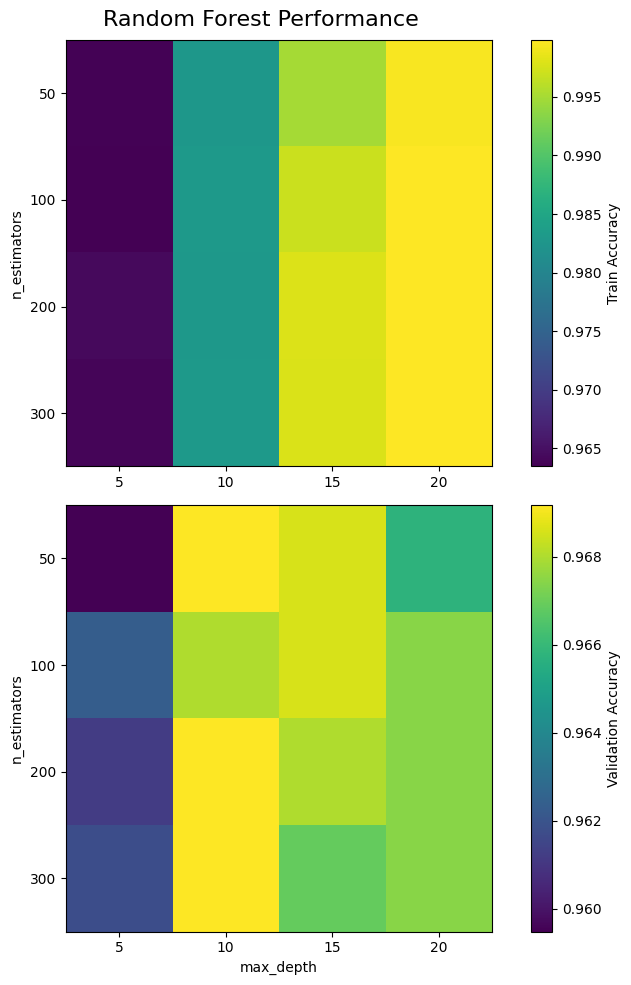

In [66]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the range of hyperparameters to compare
n_estimators = [50, 100, 200, 300]
max_depths = [5, 10, 15, 20]

# Create empty lists to store accuracy scores for each hyperparameter combination
train_scores = []
val_scores = []

for n_estimator in n_estimators:
    for max_depth in max_depths:
        print(f"n_estimators: {n_estimator}, max_depth: {max_depth}")

        # Train and evaluate the Random Forest Classifier with given hyperparameters
        rf = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth)
        rf.fit(X_train, y_train)

        # Evaluate the model on the training set
        train_score = accuracy_score(y_train, rf.predict(X_train))
        train_scores.append(train_score)

        # Evaluate the model on the validation set
        val_score = accuracy_score(y_val, rf.predict(X_val))
        val_scores.append(val_score)

# Convert the hyperparameters to strings for plotting
n_estimators_str = [str(n) for n in n_estimators]
max_depths_str = [str(d) for d in max_depths]

# Reshape the scores for plotting
train_scores = np.array(train_scores).reshape(len(n_estimators), len(max_depths))
val_scores = np.array(val_scores).reshape(len(n_estimators), len(max_depths))

# Plot the trends of train and validation accuracy
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
im1 = axs[0].imshow(train_scores)
im2 = axs[1].imshow(val_scores)

# Customize the colorbars and axes labels
cbar1 = fig.colorbar(im1, ax=axs[0], label='Train Accuracy')
cbar2 = fig.colorbar(im2, ax=axs[1], label='Validation Accuracy')
axs[0].set_xticks(range(len(max_depths)))
axs[0].set_xticklabels(max_depths_str)
axs[0].set_yticks(range(len(n_estimators)))
axs[0].set_yticklabels(n_estimators_str)
axs[0].set_ylabel('n_estimators')
axs[1].set_xticks(range(len(max_depths)))
axs[1].set_xticklabels(max_depths_str)
axs[1].set_yticks(range(len(n_estimators)))
axs[1].set_yticklabels(n_estimators_str)
axs[1].set_xlabel('max_depth')
axs[1].set_ylabel('n_estimators')

plt.suptitle('Random Forest Performance', fontsize=16)
plt.tight_layout()
plt.show()

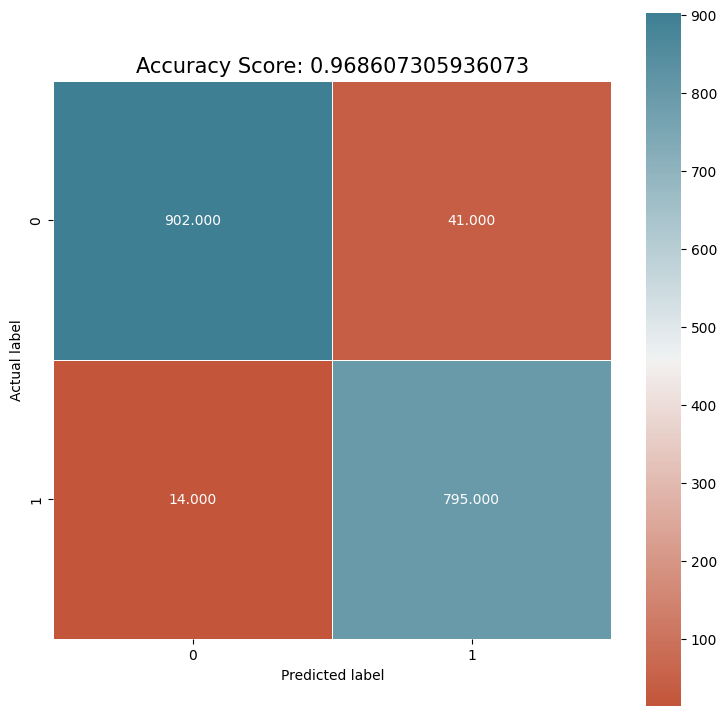

In [69]:
model_random = RandomForestClassifier(n_estimators = 100, max_depth = 10)
model_random.fit(X_train, y_train)

rf_y_pred = model_random.predict(X_val)
rf_score = model_random.score(X_val, y_val)
visualize_confusion_matrix(y_val, rf_y_pred, rf_score)

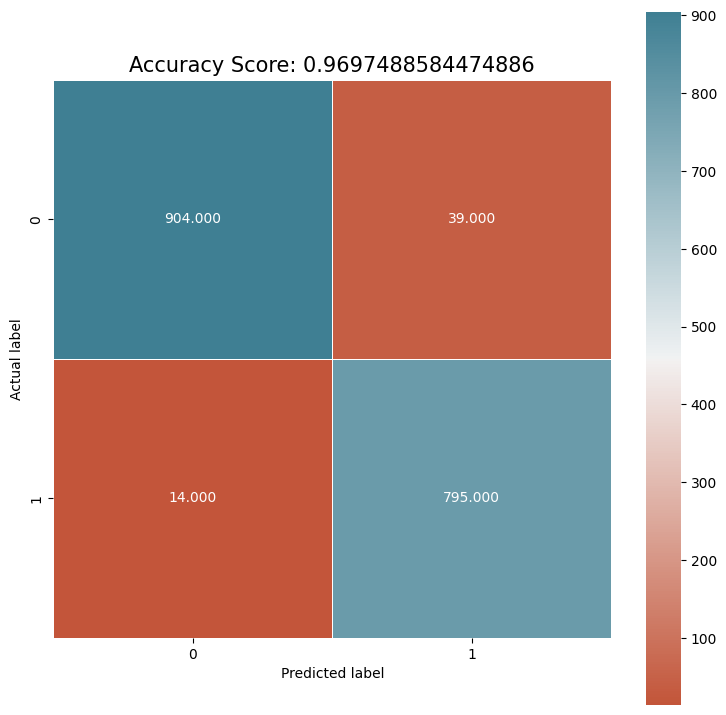

In [68]:
model_random_2 = RandomForestClassifier(n_estimators = 200, max_depth = 10)
model_random_2.fit(X_train, y_train)

rf_y_pred_2 = model_random_2.predict(X_val)
rf_score_2 = model_random_2.score(X_val, y_val)
visualize_confusion_matrix(y_val, rf_y_pred_2, rf_score_2)

#### Final Model

In [71]:
# Inspect the test data
# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')

test = df_test[features]
test = pd.DataFrame(imputer.fit_transform(test), columns=test.columns)

model_random = RandomForestClassifier(n_estimators = 100, max_depth = 10)
model_random.fit(X_train, y_train)

predictions = model_random.predict(test)
predictions = predictions.astype(int)

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions

to_save.to_csv('submission.csv', index=False)

# See below for instructions on how to upload submission.csv to Kaggle,
# in order to evaluate your model and get points.

### **Discussion**



#### **[7 Pts] Training the Models**

**Instructions**: Discuss what models you tried, and what you did to improve your initial predictions. Discuss what hyperparameters you tried, and which hyperparameters seemed important for your final model. Finally, discuss what you are inferring from the above visualiation(s).

- I think Neural Networks, k-NN and Adaboost are too complex and might not fit in the task of binary classification. I tried Logistic Regression, Decision Tree, and Random Forest. I find out that in Logistic Regression, the accuracy of train set and validation set are both decreasing as lambda increases. Therefore I turned to Decision Tree and Random Forest Classifier. Comparing the performances, Decision Tree performs better at the beginning for train set. However, because Decision Tree is prone to overfitting, I found out Random Forest perform better on the validation set as `max_depth` increases. 
- I choose the final model of RandomForest Classifier based on its performance(accuracy) on validation set compared with DecisionTree. I tried `max_depth` and `n_estimators` hyperparameters using gridsearch to fine the best parameters. According to the heatmap and the gridsearch, the best combination turns out to be `max_depth = 10` and `n_estimators = 100`. For Random Forest models, `max_depth` seems to be important because an appropriate number of depth can efficiently avoid overfitting in methods involving Decision Tree.

#### **[3 Pts] Feature Selection**

**Instructions**: Discuss what features you used and whether you did some transformations on them. What features seemed important for your final model?

- `course_id` and `userid_DI` are both variables identifying the different entries of data, having no correlation in indicating if an entry is certified or not; Therefore I excluded them from the model input features. 
- `nplay_video` has 77% of missing value, dropping this column might improve the performance of the model. 
- To avoid overfitting, I want to cut down the number of features selected. Regarding the `final_cc_cname_DI`, `start_time_DI`, `last_event_DI`, using one-hot encoding will have miscellaneous number of input columns, increasing the dimensionality of the data; and using label encoding cannot approriately represent the correlation to the output column since the countries is not an ordinal variable. Therefore, I decided not to include those columns. 
- I draw the heat map for numeric and categorical variables separately, and found out numeric variable`YoB`, categorical variable `gender` and `LoE_DI` are not significantly correlated with the target column `certified`. 
- Therefore, I decide to include `registered`, `viewed`, `explored`, `nevents`, `ndays_act`, `nchapters`, `nforum_posts` in my model. 

#### **[5 Pts] Ethical Implications**

**Instructions**: Consider and discuss the ethical implications of using the model you trained. Imagine you were hired to work as a data scientist for an online education platform (exciting, right?). They want to use your model to predict which students they should tailor their course material towards so they can maximize their profits. Their idea is to use the model to help predict which student groups (i.e. from specific countries or certain educational backgrounds) would make them the most money by getting the most participants to complete their paid certificate program. Are there any ethical considerations we should think about before acting on that plan?

- I found no significant correlation between educational background and completing the certificate program during my approach. 
- The idea of using the model to help predict which student groups would make the most money by getting the most participants to complete their certificate program can cause ethical considerations of generating more biases, discriminations, and put oppression over certain groups that are identified as "more profitable," and treated them differently because the differences of profits they can bring. Prioritizing profit maximization might fail in providing accessibility and equity of education. Tailoring course material based on predicted profitability also causes biases and discrimination. If certain student groups are systematically excluded or receive less attention because of predictions, it can cause educational inequality and limit opportunities for underrepresented and marginalized groups. 